In [242]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Activation,Dropout 
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import LambdaCallback

In [243]:
df = pd.read_csv('Iris.csv')
df.loc[df["flower"]=="Iris-setosa","flower"]=0
df.loc[df["flower"]=="Iris-versicolor","flower"]=1
df.loc[df["flower"]=="Iris-virginica","flower"]=2
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [245]:
from keras.utils import np_utils
y_train=np_utils.to_categorical(y_train,num_classes=3)
y_test=np_utils.to_categorical(y_test,num_classes=3)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of y_train (120, 3)
Shape of y_test (30, 3)


In [261]:
model = Sequential()
model.add(Dense(1000,input_dim=4,activation='relu'))
model.add(Dense(500,input_dim=4,activation='relu'))
model.add(Dense(100,input_dim=4,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
opt = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
weights_1 = []; weights_2 = []; weights_3 = []
print_weights_1 = LambdaCallback(on_epoch_end=lambda batch, logs: weights_1.append(model.layers[0].get_weights()[0][0][0]))
print_weights_2 = LambdaCallback(on_epoch_end=lambda batch, logs: weights_2.append(model.layers[1].get_weights()[0][0][0]))
print_weights_3 = LambdaCallback(on_epoch_end=lambda batch, logs: weights_3.append(model.layers[2].get_weights()[0][0][0]))

In [262]:
history = model.fit(X_train, y_train, epochs=15, batch_size=25, callbacks=[print_weights_1, print_weights_2, print_weights_3])

Epoch 1/15
120/120 [==============================] - 2s 19ms/step - loss: 0.9990 - acc: 0.4417
Epoch 2/15
120/120 [==============================] - 0s 1ms/step - loss: 0.7202 - acc: 0.6833
Epoch 3/15
120/120 [==============================] - 0s 1ms/step - loss: 0.5347 - acc: 0.6833
Epoch 4/15
120/120 [==============================] - 0s 1ms/step - loss: 0.4445 - acc: 0.7667
Epoch 5/15
120/120 [==============================] - 0s 1ms/step - loss: 0.3459 - acc: 0.8667
Epoch 6/15
120/120 [==============================] - 0s 1ms/step - loss: 0.2853 - acc: 0.9250
Epoch 7/15
120/120 [==============================] - 0s 1ms/step - loss: 0.2566 - acc: 0.9167
Epoch 8/15
120/120 [==============================] - 0s 1ms/step - loss: 0.2386 - acc: 0.8750
Epoch 9/15
120/120 [==============================] - 0s 1ms/step - loss: 0.2361 - acc: 0.9083
Epoch 10/15
120/120 [==============================] - 0s 1ms/step - loss: 0.2033 - acc: 0.9000
Epoch 11/15
120/120 [===========================

In [263]:
prediction=model.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)

accuracy=np.sum(y_label==predict_label)/length * 100 
print("Accuracy of the dataset",accuracy )

Accuracy of the dataset 100.0


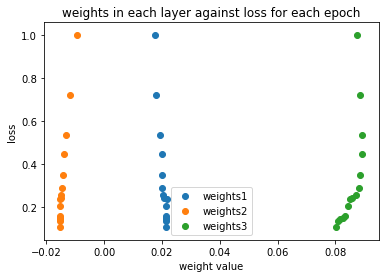

In [266]:
import matplotlib.pyplot as plt
# summarize history for loss
fig, ax = plt.subplots()
for i, val in enumerate([weights_1, weights_2, weights_3]):
    ax.scatter(val, history.history['loss'], label='weights'+str(i+1))
ax.legend()
plt.title('weights in each layer against loss for each epoch')
plt.ylabel('loss')
plt.xlabel('weight value')
plt.show()